# Convolutional Neural Network Implementation in GWU_NN
Demo of simple CNN vs Dense network trained on MNIST handwritten digits dataset. Binary Classifier of 1's and 0's.

## Import libraries 
Only using sklearn and tensorflow for test_train_split and importing the mnist dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist

from gwu_nn.gwu_network import GWUNetwork
from gwu_nn.layers import Dense, Convolutional, Flatten, MaxPool

## Setting up the data
Load the MNIST dataset and split into training and testing sets. Only add images to training/testing that are of 0s or 1s (because it will be a binary classifier).

In [2]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

num1 = 0
num2 = 1
x_train_sample = []
y_train_sample = []
train_samples = 200

for i in range(len(X_train)):
    if y_train[i] == num1 or y_train[i] == num2:
        x_train_sample.append(X_train[i])
        y_train_sample.append(y_train[i])
    if len(x_train_sample) >= train_samples:
        break

x_test_sample = []
y_test_sample = []
i_test_sample = []
samples = 500

for i in range(len(X_test)):
    if y_test[i] == num1 or y_test[i] == num2:
        x_test_sample.append(X_test[i])
        y_test_sample.append(y_test[i])
        i_test_sample.append(i)
    if len(x_test_sample) >= samples:
        break
        
print("x_train_sample: " + str(np.array(x_train_sample).shape))
print("x_test_sample: " + str(np.array(x_test_sample).shape))

x_train_sample: (200, 28, 28)
x_test_sample: (500, 28, 28)


## Training a Dense Network
Setup and train a simple dense network to use as benchmark against the CNN model.

In [3]:
np.random.seed(1)
np.random.RandomState(1)

dense = GWUNetwork()
dense.add(Flatten(28,input_channels=1)) # Flat layer so the image is in the right dimensions
dense.add(Dense(20, activation='relu'))
dense.add(Dense(1, add_bias=False, activation='sigmoid'))

# Finally to complete our model we need to compile it. This defines our loss function and learning_rate
dense.compile(loss='log_loss', lr=0.001)
print(dense)
dense.fit(x_train_sample, y_train_sample, epochs=1)

Model:
Flatten - (28, 784)
Dense - (784, 20)
Dense - (20, 1)



/mnt/d/sync/gw/fall2021/csci6907_neural_networks/gwu_nn/gwu_nn/loss_functions.py:34: RuntimeWarning: divide by zero encountered in log
  return np.mean(-np.log(y_pred)*y_true + -np.log(1-y_pred)*(1-y_true))
/mnt/d/sync/gw/fall2021/csci6907_neural_networks/gwu_nn/gwu_nn/loss_functions.py:34: RuntimeWarning: invalid value encountered in multiply
  return np.mean(-np.log(y_pred)*y_true + -np.log(1-y_pred)*(1-y_true))


epoch 1/1   error=nan


## Evaluating the Dense Network
Generate predictions using the test split.

In [4]:
# Predict using the test set. Calculate the accuracy
dense_raw_predictions = dense.predict(x_test_sample)

dense_predictions = [round(x[0][0]) for x in dense_raw_predictions]
dense_actual = [y for y in y_test_sample]
count = 0
for p,a in zip(dense_predictions,dense_actual):
    if p == a:
        count += 1

print("Dense model accuracy: " + str(100 * count/len(dense_predictions)))

Dense model accuracy: 79.4


## Training a Convolutional Neural Network
Setup and train a simple CNN. Only using one convolutional layer to keep things fast.

In [5]:
np.random.seed(1)
np.random.RandomState(1)

cnn = GWUNetwork()
cnn.add(Convolutional(input_size=28, input_channels=1, kernel_size=3, num_kernels=1, activation='relu'))
cnn.add(MaxPool(28,2))
cnn.add(Flatten(14,input_channels=1)) # input size = 28/2
cnn.add(Dense(40, activation='relu')) # gets double the neurons here since input is only 14 (vs dense's 28)
cnn.add(Dense(1, add_bias=False, activation='sigmoid'))

# Finally to complete our model we need to compile it. This defines our loss function and learning_rate
cnn.compile(loss='log_loss', lr=0.001)
print(cnn)
cnn.fit(x_train_sample, y_train_sample, epochs=1)

Model:
Convolutional - (28, 28)
MaxPool - (28, 14)
Flatten - (14, 196)
Dense - (196, 40)
Dense - (40, 1)

epoch 1/1   error=nan


## Evaluating the CNN
Generate predictions using the test split.

In [6]:
# Predict using the test set. Calculate the accuracy
cnn_raw_predictions = cnn.predict(x_test_sample)

# calculate accuracy and show incorrect classifications
cnn_predictions = [round(x[0][0]) for x in cnn_raw_predictions]
count = 0
for p,a,i in zip(cnn_predictions,y_test_sample,i_test_sample):
    if p == a:
        count += 1

print("CNN model accuracy: " + str(100 * count/len(cnn_predictions)))
#print(cnn_predictions)
#print(y_test_sample)

CNN model accuracy: 89.0


## Show a random evaluation
Visualize the predictions by showing the prediction from both networks against the actual image.

Dense Prediction: 0
CNN Prediction: 0
Actual: 0


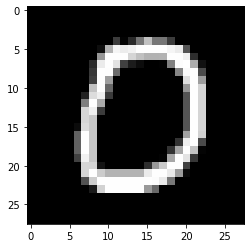

In [7]:
show_idx = 3

print("Dense Prediction: " + str(dense_predictions[show_idx]))
print("CNN Prediction: " + str(cnn_predictions[show_idx]))
print("Actual: " + str(y_test_sample[show_idx]))
ax = plt.subplot()
plt.imshow(x_test_sample[show_idx], cmap='gray')
plt.show()

## Visualize the Kernel Weights
Lets see what the kernel weights look like...

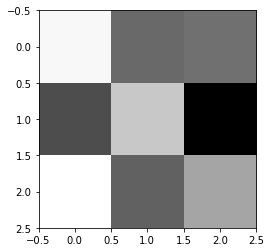

In [8]:
kernel = cnn.layers[0].kernels.reshape(3,3)

plt.imshow(kernel, cmap='gray')